In [358]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# ------------------- Load and preprocess labels -------------------

# Load label files
main_labels = pd.read_csv('data_labels_mainData.csv')
extra_labels = pd.read_csv('data_labels_extraData.csv')
combined_labels = pd.concat([main_labels, extra_labels], ignore_index=True)

# Image folder
image_folder = "C:/Users/sweet/Downloads/Image_classification_data/patch_images"

# ------------------- Task 1: Cancerous classification -------------------

# Stratified splitting
train_labels_t1, temp_labels_t1 = train_test_split(
    combined_labels, test_size=0.3, random_state=42, stratify=combined_labels['isCancerous']
)
val_labels_t1, test_labels_t1 = train_test_split(
    temp_labels_t1, test_size=0.5, random_state=42, stratify=temp_labels_t1['isCancerous']
)

# Flow generators expect string labels
for df in [train_labels_t1, val_labels_t1, test_labels_t1]:
    df['isCancerous'] = df['isCancerous'].astype(str)

# ------------------- Task 2: Cell type classification -------------------

# Only use main_labels for this task
train_labels_t2, temp_labels_t2 = train_test_split(
    main_labels, test_size=0.3, random_state=42, stratify=main_labels['cellType']
)
val_labels_t2, test_labels_t2 = train_test_split(
    temp_labels_t2, test_size=0.5, random_state=42, stratify=temp_labels_t2['cellType']
)

# Convert cell type labels to string as well
for df in [train_labels_t2, val_labels_t2, test_labels_t2]:
    df['cellType'] = df['cellType'].astype(str)

# ------------------- Define ImageDataGenerators -------------------

# Augment training data
train_datagen = ImageDataGenerator(
    rescale=1./255, #normalize
    # rotation_range=15,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # zoom_range=0.1,
    # horizontal_flip=True
)

# No augmentation for validation/test
test_datagen = ImageDataGenerator(rescale=1./255)

# ------------------- Flow generators (Task 1) -------------------

train_gen_t1 = train_datagen.flow_from_dataframe(
    dataframe=train_labels_t1,
    directory=image_folder,
    x_col='ImageName',
    y_col='isCancerous',
    target_size=(27, 27),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42
)

val_gen_t1 = test_datagen.flow_from_dataframe(
    dataframe=val_labels_t1,
    directory=image_folder,
    x_col='ImageName',
    y_col='isCancerous',
    target_size=(27, 27),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

test_gen_t1 = test_datagen.flow_from_dataframe(
    dataframe=test_labels_t1,
    directory=image_folder,
    x_col='ImageName',
    y_col='isCancerous',
    target_size=(27, 27),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# ------------------- Flow generators (Task 2) -------------------

train_gen_t2 = train_datagen.flow_from_dataframe(
    dataframe=train_labels_t2,
    directory=image_folder,
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

val_gen_t2 = test_datagen.flow_from_dataframe(
    dataframe=val_labels_t2,
    directory=image_folder,
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

test_gen_t2 = test_datagen.flow_from_dataframe(
    dataframe=test_labels_t2,
    directory=image_folder,
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)
print(train_labels_t2['ImageName'].sample(5))
print(os.listdir(image_folder)[:5])

missing = [f for f in train_labels_t1['ImageName'] if not os.path.isfile(os.path.join(image_folder, f))]
print(f"Missing files: {len(missing)}")
print(missing[:10])

Found 1750 validated image filenames belonging to 2 classes.


C:\Users\sweet\anaconda3\envs\tf_env\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 12446 invalid image filename(s) in x_col="ImageName". These filename(s) will be ignored.
  warnings.warn(


Found 424 validated image filenames belonging to 2 classes.
Found 371 validated image filenames belonging to 2 classes.


C:\Users\sweet\anaconda3\envs\tf_env\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 2618 invalid image filename(s) in x_col="ImageName". These filename(s) will be ignored.
  warnings.warn(
C:\Users\sweet\anaconda3\envs\tf_env\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 2671 invalid image filename(s) in x_col="ImageName". These filename(s) will be ignored.
  warnings.warn(


Found 868 validated image filenames belonging to 4 classes.
Found 190 validated image filenames belonging to 4 classes.
Found 177 validated image filenames belonging to 4 classes.


C:\Users\sweet\anaconda3\envs\tf_env\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 6059 invalid image filename(s) in x_col="ImageName". These filename(s) will be ignored.
  warnings.warn(
C:\Users\sweet\anaconda3\envs\tf_env\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 1294 invalid image filename(s) in x_col="ImageName". These filename(s) will be ignored.
  warnings.warn(
C:\Users\sweet\anaconda3\envs\tf_env\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 1308 invalid image filename(s) in x_col="ImageName". These filename(s) will be ignored.
  warnings.warn(


6447     8219.png
8019     3356.png
6784     3956.png
236     18640.png
7891     5543.png
Name: ImageName, dtype: object
['10040.png', '10041.png', '10042.png', '10043.png', '10054.png']
Missing files: 12446
['15334.png', '20291.png', '5185.png', '3891.png', '9577.png', '15857.png', '17014.png', '1512.png', '14247.png', '16719.png']


In [7]:
# ------------------- Build and train CNN -------------------
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_t1), y=y_train_t1)
class_weights = dict(enumerate(class_weights))
print("📏 Class weights:", class_weights)

# Model definition
model_t1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(27, 27, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_t1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images_t1)

# Train
history = model_t1.fit(
    datagen.flow(train_images_t1, y_train_t1, batch_size=32),
    validation_data=(val_images_t1, y_val_t1),
    epochs=20,
    class_weight=class_weights,
    verbose=1
)


NameError: name 'y_train_t1' is not defined

In [9]:
# ------------------- Evaluation -------------------

# Accuracy & Loss Plots
def plot_training(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Train Acc")
    plt.plot(history.history['val_accuracy'], label="Val Acc")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Val Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training(history)

NameError: name 'history' is not defined

In [11]:
# Predictions
y_probs = (model_t1.predict(test_images_t1) >= 0.5).astype(int)


print(classification_report(y_test_t1, y_probs, target_names=["Not Cancerous", "Cancerous"]))

# Per-class bar plot
def plot_precision_recall_f1(y_true, y_pred, class_names):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred)
    metrics = {'Precision': precision, 'Recall': recall, 'F1-score': f1}

    plt.figure(figsize=(10, 5))
    for i, (metric, values) in enumerate(metrics.items()):
        plt.bar(np.arange(len(values)) + i*0.25, values, width=0.25, label=metric)
    
    plt.xticks(np.arange(len(class_names)) + 0.25, class_names)
    plt.ylim(0, 1.1)
    plt.ylabel("Score")
    plt.title("Per-Class Metrics")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_precision_recall_f1(y_test_t1, y_pred_final, ["Not Cancerous", "Cancerous"])

NameError: name 'model_t1' is not defined

# Task 2 Classify Images According to Cell Type
Task 2 was to create a model that would be able to classify cells into any four categories; fibroblast, inflammatory, epithelial or others. The purpose was to create a model that could identify them as accurately as possible.

## Baseline Model
The algorithm chosen for the baseline model was CNN as the data being used is image classification. CNN is a great model for classifying images because of the use of convolutional layers, which focus on local features first and combine them to get a better level of understanding. Thus, the use of CNN, even as a baseline will be a good starting point as this is exactly what it is created to do, which will make it easier to improve the model later on. For the baseline model, I decided to keep it simple just to see how the data would react and train with the given data.

In [360]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [531]:
import tensorflow as tf


model_t2_base = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4),
])

model_t2_base.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_269 (Conv2D)         (None, 27, 27, 32)        896       
                                                                 
 conv2d_270 (Conv2D)         (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_165 (MaxPool  (None, 13, 13, 32)        0         
 ing2D)                                                          
                                                                 
 flatten_43 (Flatten)        (None, 5408)              0         
                                                                 
 dense_165 (Dense)           (None, 32)                173088    
                                                                 
 dense_166 (Dense)           (None, 4)                 132       
                                                     

In [532]:
model_t2_base.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [541]:
history_t2_base = model_t2_base.fit(train_gen_t2, validation_data = val_gen_t2, epochs=50, verbose=0)

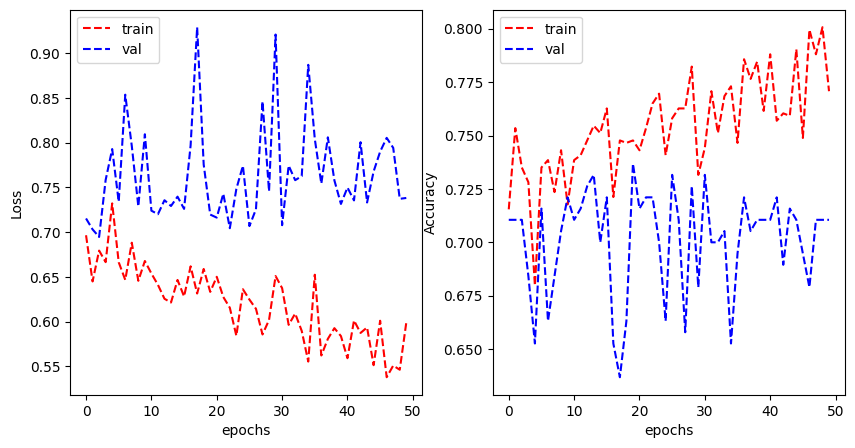

6/6 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        42
           1       0.61      0.63      0.62        35
           2       0.85      0.90      0.88        70
           3       0.62      0.33      0.43        30

    accuracy                           0.72       177
   macro avg       0.68      0.66      0.65       177
weighted avg       0.71      0.72      0.71       177



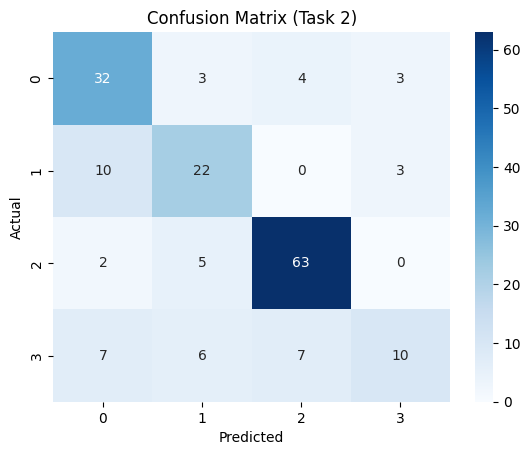

In [542]:
plot_learning_curve(history_t2_base.history['loss'], history_t2_base.history['val_loss'], 
                    history_t2_base.history['categorical_accuracy'], history_t2_base.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')
y_probs_t2_base = model_t2_base.predict(test_gen_t2, verbose=1)
y_pred_final_t2_base = np.argmax(y_probs_t2_base, axis=1)
print(classification_report(test_gen_t2.labels, y_pred_final_t2_base, target_names=["0", "1", "2", "3"]))
cm_t2_base = confusion_matrix(test_gen_t2.labels, y_pred_final_t2_base)
sns.heatmap(cm_t2_base, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1", "2", "3"], yticklabels=["0", "1", "2", "3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Task 2)")
plt.show()

## Analysing Data
As can bee seen looking at the line charts and scores, the model is obviously overfitted. However, it still achieved a respectable 67% accuracy score. The f1 scores and precisions scores also align with how the data is weighted. The data has mainly cell-type 2(inflammatory), and the least of others, showing that the data may require weights for proper training.

## Improved Model
For the improved model, I decided to stick with using the same CNN architecture since it’s already well-suited for image classification. Instead of changing the model type, I focused on making it deeper by adding more convolutional layers and tweaking other parts of the model. As mentioned earlier, I originally thought class weighting would help with class imbalance, and thus decided that introducing that along with the other augmentations wou

To help the model generalize better, I used different kinds of data augmentation like zoom, height and width shifts, rotation, and horizontal flipping. These help the model learn from slightly different versions of the same image. In medical tasks, horizontal flipping is especially helpful because left-right versions of a cell can still carry important information.

To improve the model itself, I added three blocks of convolutional layers, where each block had two Conv2D layers followed by BatchNormalization. After each block, I used MaxPooling2D to reduce the size of the feature maps and keep only the most important information. This helped reduce overfitting and made the model more efficient overall. Dropout was also introduced in the fully connected layer, which would ultimately help with the generalisation of the model.

In [544]:
reg_lambda = 0.001
train_datagen_new = ImageDataGenerator(
    rescale=1./255, rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)

train_gen_t2 = train_datagen_new.flow_from_dataframe(
    dataframe=train_labels_t2,
    directory=image_folder,
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

model_t2 = tf.keras.Sequential([
    # VGG Block 1
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # VGG Block 2
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # VGG Block 3
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Fully Connected
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 classes
])
model_t2.summary()

Found 868 validated image filenames belonging to 4 classes.


C:\Users\sweet\anaconda3\envs\tf_env\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 6059 invalid image filename(s) in x_col="ImageName". These filename(s) will be ignored.
  warnings.warn(


Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_271 (Conv2D)         (None, 27, 27, 32)        896       
                                                                 
 batch_normalization_259 (B  (None, 27, 27, 32)        128       
 atchNormalization)                                              
                                                                 
 activation_259 (Activation  (None, 27, 27, 32)        0         
 )                                                               
                                                                 
 conv2d_272 (Conv2D)         (None, 27, 27, 32)        9248      
                                                                 
 batch_normalization_260 (B  (None, 27, 27, 32)        128       
 atchNormalization)                                              
                                                     

In [545]:
model_t2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_categorical_accuracy', factor=0.5, patience=3, min_lr=1e-5, verbose=1
)


In [546]:
model_t2.fit(
    train_gen_t2,
    validation_data=val_gen_t2,
    epochs=100,
    callbacks=[reduce_lr],
    verbose=0
)


Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 15: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 27: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 30: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 33: ReduceLROnPlateau reducing learning rate to 1e-05.


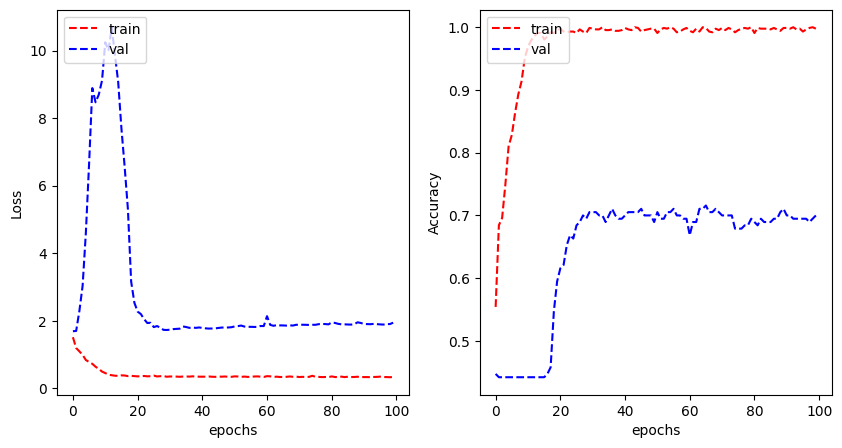

In [547]:
plot_learning_curve(history_t2.history['loss'], history_t2.history['val_loss'], 
                    history_t2.history['categorical_accuracy'], history_t2.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

6/6 [==============================] - 0s 31ms/step
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        42
           1       0.61      0.57      0.59        35
           2       0.91      0.91      0.91        70
           3       0.50      0.53      0.52        30

    accuracy                           0.75       177
   macro avg       0.70      0.70      0.70       177
weighted avg       0.75      0.75      0.75       177



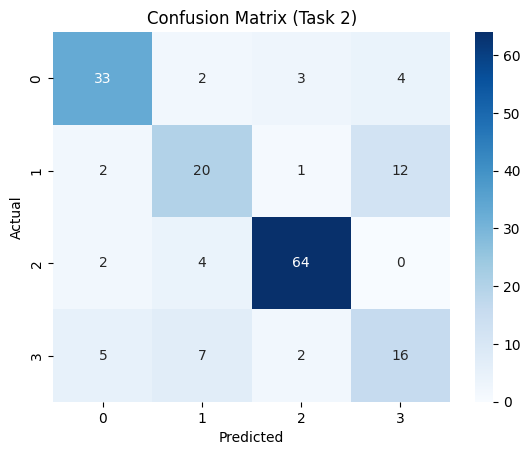

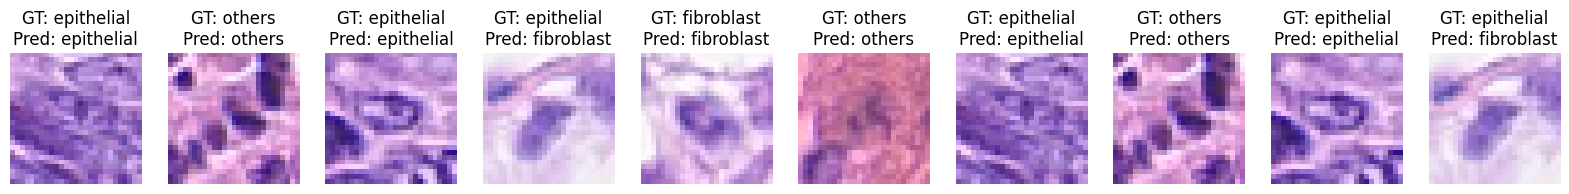

In [522]:
y_probs_t2 = model_t2.predict(test_gen_t2, verbose=1)
y_pred_final_t2 = np.argmax(y_probs_t2, axis=1)
print(classification_report(test_gen_t2.labels, y_pred_final_t2, target_names=["0", "1", "2", "3"]))
cm_t2 = confusion_matrix(test_gen_t2.labels, y_pred_final_t2)
sns.heatmap(cm_t2, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1", "2", "3"], yticklabels=["0", "1", "2", "3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Task 2)")
plt.show()

label_names = {'fibroblast': 0, 'inflammatory': 1, 'epithelial': 2, 'others': 3}
d_inv = {v: k for k, v in label_names.items()}

plt.figure(figsize=(20, 6))
batches = 0

for x, y in test_gen_t2:
    batches += 1
    y_hat = model_t2.predict(x, verbose=0)

    if batches <= 10:
        image = x[0]
        label = y[0]
        pred = y_hat[0]

        plt.subplot(1, 10, batches)
        plt.imshow(image)
        plt.title(f"GT: {d_inv[np.argmax(label)]}\nPred: {d_inv[np.argmax(pred)]}")
        plt.axis('off')
    else:
        break


## Results Analysis and final result after tweaking 
Looking at the final model, I ended up removing class weighting altogether. After lots of tweaking — adding and removing layers, tuning dropout rates, and using callbacks like ReduceLROnPlateau — I noticed that removing the weights actually gave a noticeable boost in performance, with accuracy increasing by around 3%. It seems that even though there was an imbalance in the dataset, the three main cell categories were still dominant and clearly defined, which meant that forcing the model to compensate for the smaller “other” class didn’t really help. In fact, balancing the weights appeared to confuse the model more than help, so leaving them out ended up improving the overall results. Overall, in comparison to the baseline, there was signifant improvement of the overall accuracy, of about 77%.

# Independant Evaluation
The paper by Hassan et al. (2019) looks at how deep learning, especially CNNs, can be used to classify histopathology images for mesothelioma. Their model seemed to do really well at identifying different cell types and even predicting patient outcomes accurately. For our purposes, we mainly looked at the part of their study on single-cell morphological heterogeneity since that’s most similar to what Task 2 focused on.

If we compare their CNN model to the baseline models used for Task 1 and Task 2, theirs likely performs better. They don’t give exact accuracy scores, but they mention that their model can predict cell types with low error even for new, unseen cells. The Task 2 baseline model only reached about 67% accuracy, and the Task 1 baseline was a bit better at around 81%. But in terms of structure, the Task 2 model is more like theirs, since both aim to classify cell types rather than just a binary label.

One major difference is in the depth of the models. The baseline models only had one block of convolutional layers and a single MaxPooling layer. In the improved versions, more blocks were added — three for Task 1 and four for Task 2. The paper’s model went even deeper, using six convolutional layers and average pooling. A big reason they could do this is because their image input size was a lot bigger (244×244 vs. my 27×27), which gives the model more room to extract meaningful features and perform better overall.

Still, the structure of the models is really similar — convolution layers, batch normalization, pooling, and then fully connected layers with softmax at the end. So, even though their model is more advanced, it’s clear that my approach is built on a strong foundation, and with more data or higher resolution images, these models could work quite well in real-world medical settings too.

Semi-supervised learning is a method where the model is trained using a small amount of labeled data and a larger portion of unlabeled data. In the case of Task 2, this could’ve been applied by using the data_labels_extraData.csv file. This file contains image names but doesn’t include the actual cell type labels — which makes it perfect for semi-supervised learning.

By using these unlabeled images during training, the model could learn to generalize better. Instead of just relying on the small labeled dataset, it gets exposed to more variation and potentially picks up on patterns that make it stronger overall. This approach can really boost accuracy, especially when labeled data is limited — which is often the case in medical datasets where annotation takes time and expert knowledge.

However, semi-supervised learning does come with risks. Since the model isn’t told what the unlabeled data actually is, it might start picking up the wrong features or patterns, especially if the data is noisy or not well-distributed. So, while it can help improve performance, it also has to be used carefully.

A real-world example where semi-supervised learning is useful is in breast cancer detection using mammograms. It’s expensive and time-consuming to get every image labeled by a professional, but using a mix of labeled and unlabeled images could still help train a reliable model without needing full annotations for everything. 